<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0712_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
answer=[0,1,1]
def fibonacci2(n):
  if n >= len(answer):
    re = fibonacci2(n-1) + fibonacci2(n-2)
    answer.append(re)
  return answer[n]

In [3]:
for i in range(35,50):
    a=fibonacci2(i)
    print(a)

9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
4807526976
7778742049


In [11]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [12]:
np.max(x_train)

255

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

# 모델 생성

In [15]:
from keras import models
from keras import layers

In [19]:
model=models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


# 학습

In [21]:
hist=model.fit(x_train,y_train,epochs=100,
               batch_size=128,
               validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 7s 16ms/step - loss: 0.2988 - accuracy: 0.9166 - val_loss: 0.1549 - val_accuracy: 0.9562
Epoch 2/100
375/375 [==============================] - 4s 12ms/step - loss: 0.1232 - accuracy: 0.9644 - val_loss: 0.1183 - val_accuracy: 0.9635
Epoch 3/100
375/375 [==============================] - 4s 12ms/step - loss: 0.0807 - accuracy: 0.9766 - val_loss: 0.0948 - val_accuracy: 0.9712
Epoch 4/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0581 - accuracy: 0.9832 - val_loss: 0.0846 - val_accuracy: 0.9736
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 0.0422 - accuracy: 0.9882 - val_loss: 0.0836 - val_accuracy: 0.9747
Epoch 6/100
375/375 [==============================] - 5s 14ms/step - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.0861 - val_accuracy: 0.9737
Epoch 7/100
375/375 [==============================] - 4s 12ms/step - loss: 0.0232 - accuracy: 0.9941 - val_loss: 0.0812 - val_accuracy:

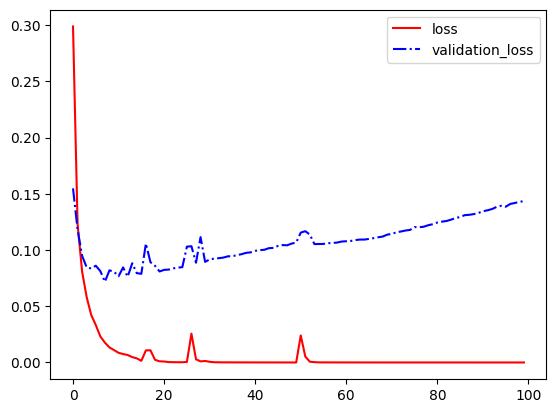

In [24]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],'r-',label='loss')
plt.plot(hist.history['val_loss'],'b-.',label='validation_loss')
plt.legend()
plt.show()

In [25]:
pred=model.predict(x_test)


313/313 [==============================] - 2s 5ms/step


In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1251 - accuracy: 0.9835


[0.1250668317079544, 0.9835000038146973]

In [28]:
def add(x2d,y2d):
  r2d = x2d.copy()
  for i in range(x2d.shape[0]):
    for j in range(x2d.shape[1]):
      r2d[i,j] = x2d[i,j] + y2d[i,j]
  return r2d

In [30]:
x=np.random.random((3,3))
y=np.random.random((3,3))
print(x)
print(y)
add(x,y)

[[0.7796425  0.65650155 0.55431818]
 [0.39741509 0.76556864 0.92421554]
 [0.89278291 0.26712461 0.64071986]]
[[0.1740413  0.83293158 0.85676861]
 [0.6193775  0.49444509 0.12296094]
 [0.37136338 0.99610164 0.62529341]]


array([[0.9536838 , 1.48943313, 1.41108679],
       [1.01679259, 1.26001374, 1.04717648],
       [1.26414629, 1.26322625, 1.26601327]])

In [ ]:
x=np.random.random((28,28))
y=np.random.random((28,28))
x+y